# MiniProject 4: K-Means Clustering

### How to run this notebook
- **Run all cells in order using _"Run All"_ in the Cell menu**
- If you wish to re-run a cell, you must re-run all cells in order after restarting the kernel

- In certain cases, if the output of a cell is too large, you can click the _"Open full output data in text editor"_ button to view it. 

- *If any cell returns an error or takes longer than a few seconds to run, pressing restart and re-running all cells in order should fix it.*


K-means is one of the widely used unsupervised learning algorithms that solve the
well-known clustering problem. The procedure follows a simple and easy way to classify a
given data set through a certain number of clusters (assume k clusters). The main idea is to
define k centers, one for each cluster. These centers should be placed in a cunning way
because different locations will result in different results

Test your algorithm on two separate datasets (1) Use make_blobs function to generate
synthetic data set from sklearn library. (2) Use an RGB image to cluster the R,G,B data into K
clusters to demonstrate image compression. Display images before and afte

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

## K-means

### Random State Default (Seed = 0)

### Generating Synthetic Data and Plotting it

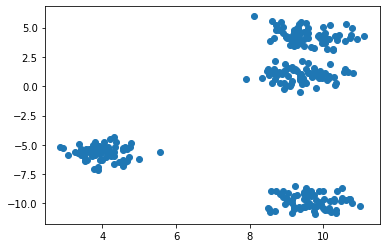

In [2]:
#generate blobs for k-means clustering with default seed
blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=4)

# convert  blobs into a numpy array
blobs = blobs[0]

# plot the blobs
plt.scatter(blobs[:,0], blobs[:,1])


### Initializer for K means

In [3]:
def create_random_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

### Initializer for K means++

In [4]:
# K-means++ algorithm using above functions
def kmeans_plus_plus(data, k):
    centroids = np.zeros((k, data.shape[1]))
    centroids[0] = data[np.random.choice(len(data))]
    for i in range(1, k):
        distances = np.sqrt(((data - centroids[:i, np.newaxis])**2).sum(axis=2))
        min_distances = np.min(distances, axis=0)
        probabilities = min_distances ** 2 / np.sum(min_distances ** 2)
        index = np.random.choice(len(data), p=probabilities)
        centroids[i] = data[index]
    return centroids

### Function to run K means and K means++

In [5]:
# create function to assign data points to clusters
def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

# create function to update centroids
def update_centroids(data, clusters, k):
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

# create function to calculate the total distance between data points and their assigned centroids using numpy, which is faster than using a for loop
def calculate_total_distance(data, clusters, centroids):
    distance = np.sqrt(((data - centroids[clusters]) ** 2).sum())
    return distance

# create function to run k-means clustering
def kmeans(data, k, algorithm):
    if algorithm == 'none':
        centroids = create_random_centroids(data, k)
    elif algorithm == 'kmeans++':
        centroids = kmeans_plus_plus(data, k)
    clusters = assign_clusters(data, centroids)
    old_distance = calculate_total_distance(data, clusters, centroids)
    while True:
        centroids = update_centroids(data, clusters, k)
        clusters = assign_clusters(data, centroids)
        new_distance = calculate_total_distance(data, clusters, centroids)
        if old_distance == new_distance:
            break
        old_distance = new_distance
    return centroids, clusters

#run k-means clustering for different values of k
def run_kmeans(data, algorithm='none'):
    k_values = range(1, 10)
    k_list = {}
    for k in k_values:
        centroids, clusters = kmeans(data, k, algorithm)
        distance = calculate_total_distance(data, clusters, centroids)
        k_list[k] = (centroids, clusters, distance)
    return k_list


### Fitting model to default seed dataset

Text(0.5, 1.0, 'Elbow Curve')

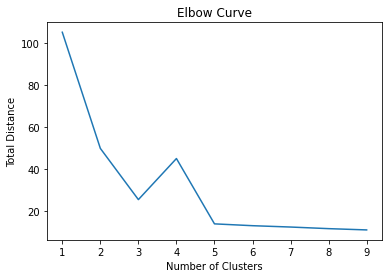

In [6]:

# run k-means clustering on blobs1
k_list = run_kmeans(blobs)

# plot the elbow curve
plt.plot(list(k_list.keys()), [k_list[k][2] for k in k_list.keys()])
plt.xlabel('Number of Clusters')
plt.ylabel('Total Distance')
plt.title('Elbow Curve')

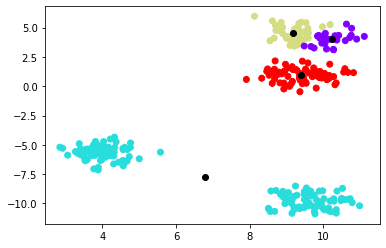

In [7]:
# plotting based on elbow curve
elbow = 4
plt.scatter(blobs[:,0], blobs[:,1], c=k_list[elbow][1], cmap='rainbow')
plt.scatter(k_list[elbow][0][:,0], k_list[elbow][0][:,1], color='black')

### Fitting model to dataset with Random State 2 (seed = 2)

Text(0.5, 1.0, 'Elbow Curve')

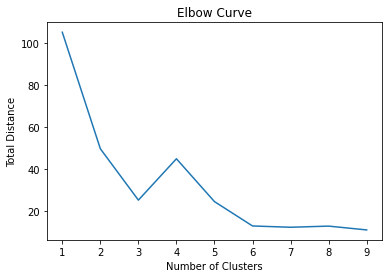

In [8]:
np.random.seed(2)
# run k-means clustering for different values of k
k_list = run_kmeans(blobs)

# plot the elbow curve
plt.plot(list(k_list.keys()), [k_list[k][2] for k in k_list.keys()])
plt.xlabel('Number of Clusters')
plt.ylabel('Total Distance')
plt.title('Elbow Curve')

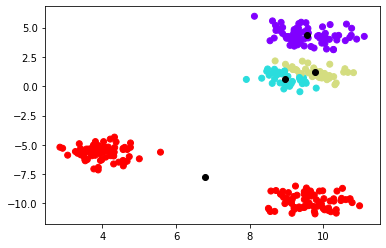

In [9]:
# plotting based on elbow curve
elbow = 4
plt.scatter(blobs[:,0], blobs[:,1], c=k_list[elbow][1], cmap='rainbow')
plt.scatter(k_list[elbow][0][:,0], k_list[elbow][0][:,1], color='black')


### Comparing the above two K-means clusters
The K-means clustering algorithm works by randomly initializing K cluster centroids and then iteratively optimizing the centroid locations to minimize the sum of squared distances between points and their assigned centroids. However, the quality of the resulting clusters depends heavily on the initial placement of the centroids. Since the initialization is random, different runs of the algorithm may produce different results, even when using the same input data and hyperparameters.

In this case, the two clusters were obtained using the same algorithm with the same input data and hyperparameters, but with different initializations due to the use of a random seed. The fact that the resulting clusters are not perfectly separated suggests that the initial states were not optimal for producing the desired clusters. By setting a different seed or trying other initialization methods, it may be possible to obtain better cluster separation.

## K-Means++

### Fitting dataset to Random State Default (Seed = 0)

Text(0.5, 1.0, 'Elbow Curve - [Kmeans++]')

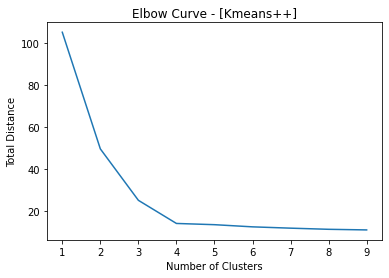

In [10]:
np.random.seed(0)

# run k-means++ clustering for different values of k
k_list = run_kmeans(blobs, 'kmeans++')

# plot the elbow curve
plt.plot(list(k_list.keys()), [k_list[k][2] for k in k_list.keys()])
plt.xlabel('Number of Clusters')
plt.ylabel('Total Distance')
plt.title('Elbow Curve - [Kmeans++]')

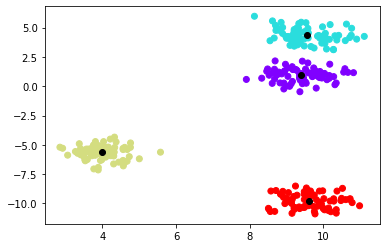

In [11]:
# plotting based on elbow curve
elbow = 4
plt.scatter(blobs[:,0], blobs[:,1], c=k_list[elbow][1], cmap='rainbow')
plt.scatter(k_list[elbow][0][:,0], k_list[elbow][0][:,1], color='black')


### Fitting dataset to Random State 2 (Seed = 2)

Text(0.5, 1.0, 'Elbow Curve - [Kmeans++]')

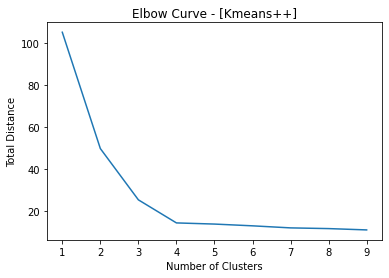

In [12]:
np.random.seed(2)

# run k-means++ clustering for different values of k
k_list = run_kmeans(blobs, 'kmeans++')

# plot the elbow curve
plt.plot(list(k_list.keys()), [k_list[k][2] for k in k_list.keys()])
plt.xlabel('Number of Clusters')
plt.ylabel('Total Distance')
plt.title('Elbow Curve - [Kmeans++]')

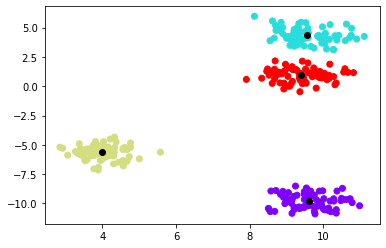

In [13]:
# plotting based on elbow curve
elbow = 4
plt.scatter(blobs[:,0], blobs[:,1], c=k_list[elbow][1], cmap='rainbow')
plt.scatter(k_list[elbow][0][:,0], k_list[elbow][0][:,1], color='black')

# Comparing above two K-means++ results
K-means++ algorithm addresses the random initialization problem by selecting the initial centroids in a smart way. Specifically, instead of randomly selecting the initial centroids from the dataset, k-means++ selects the first centroid uniformly at random from the dataset. Then, for each subsequent centroid, it selects a new datapoint that is farthest from the existing centroids. This process is repeated until all k centroids are chosen.

This results in a better initial starting point for the algorithm and a higher likelihood of finding the optimal solution. Therefore, in the case of k-means++, the algorithm is expected to converge to the same optimal clusters regardless of the initial seed value.

In the plots above, since k-means++ was used, the algorithm converged to the same perfect clusters despite different random seed values used to initialize the algorithm. Therefore, in this case, the k-means++ algorithm was able to overcome the random initialization problem and find the optimal solution.

## Comparing all 4 plots and results, Kmeans and Kmeans++
Comparing the four plots, we can observe that K means++ algorithm performs better than K means when it comes to forming stable and reliable clusters. In the first two plots, we see that K means algorithm resulted in differently shaped and sized clusters when different random seeds were used for initialization. However, in the third and fourth plots, K means++ algorithm resulted in almost identical clusters, indicating that the initialization method used by K means++ helped in finding the optimal clusters more consistently. Therefore, in situations where the data is more complex or the number of clusters is unknown, it is recommended to use K means++ over K means for more reliable and consistent clustering results.

## Using k-means clustering to compress an image

(561, 384, 3)

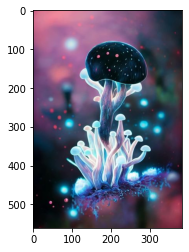

In [14]:

# load the image
image = Image.open('mushroom.jpeg')

# convert the image to a numpy array
image = np.array(image)

# plot the image
plt.imshow(image)

image.shape


In [15]:
image_reshape = image.reshape((-1, image.shape[-1]))

centroids, clusters = kmeans(image_reshape, 16, 'kmeans++')
new_image_16 = centroids[clusters].reshape(image.shape)

centroids, clusters = kmeans(image_reshape, 4, 'kmeans++')
new_image_4 = centroids[clusters].reshape(image.shape)

### Plotting the original image, and compressed images with 16 and 4 colors

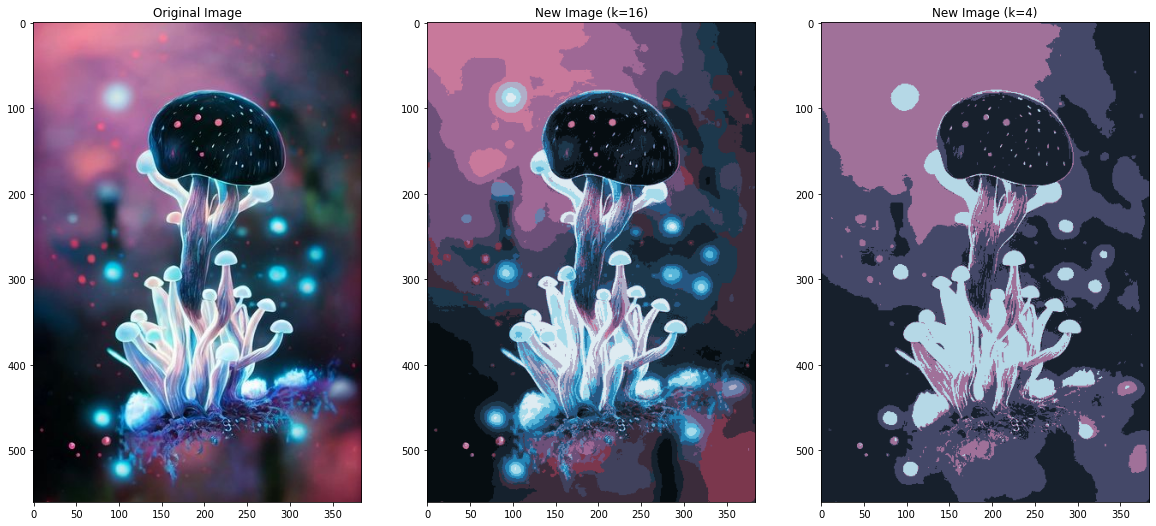

In [16]:
# plot the original image and the new images side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(new_image_16.astype('uint8'))
ax2.set_title('New Image (k=16)')
ax3.imshow(new_image_4.astype('uint8'))
ax3.set_title('New Image (k=4)')
plt.show()


# Principle Component Analysis (PCA)

Principal Components Analysis (PCA) is a dimensionality reduction algorithm that can be used
to significantly speed up your unsupervised feature learning algorithm. For example, when you
train your model on a dataset such as images, some of our data points may be meaningless in
explaining our desired target variable. Therefore, we refer to drop them from our training.


## Task 2: Users to Movies
In this task, you will work with a Users-to-Movies example (as shown below) from
http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf. Each row contains the scores
provided by a user while each column has the scores given by different users on the same
movie. The first 4 users prefer Science Fiction and the others prefer Romance. You will need
to implement the classic PCA algorithm and calculate the features after PCA.


In [17]:
m=np.array([[1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,2,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2]])

### Understand the data by plotting in 3D space

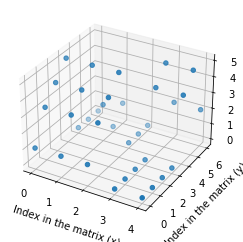

In [18]:
# Create the x, y, and z values for the 3D plot
# Get the x, y and z values for the scatter plot
x, y = np.meshgrid(np.arange(m.shape[1]), np.arange(m.shape[0]))
z = m.flatten()

# Create the scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('Index in the matrix (x)')
ax.set_ylabel('Index in the matrix (y)')
ax.set_zlabel('Value in the matrix (z)')
plt.show()

### Preprocessing step: centering the datase

In [19]:
# Centering the dataset
m_centered = m - m.mean(axis=0)

### Implement PCA using Singular Value Decomposition (SVD) 

In [20]:

def svd_pca(m):
    # Center the matrix
    m_centered = m - np.mean(m, axis=0)

    # Perform SVD on the centered matrix
    u, s, v = np.linalg.svd(m_centered)

    # Extract the eigenvalues and eigenvectors
    eig_vals = s**2 / (m_centered.shape[0]-1)
    eig_vecs = v.T

    # Calculate cumulative variance explained
    cum_var_exp = np.cumsum(eig_vals) / np.sum(eig_vals)

    # Return the principal components, singular values, eigenvalues and cumulative variance explained
    return eig_vecs, s, eig_vals, cum_var_exp

### Plot the Eigenvalies and select K (number of components)

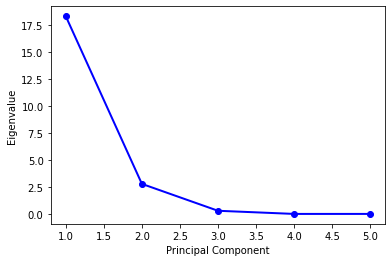

In [21]:
eig_vecs, s, eig_vals, cum_var_exp = svd_pca(m_centered)


def plot_eigenvalues(eig_vals, cum_var_exp):
    # Plot the eigenvalues
    plt.plot(np.arange(1, len(eig_vals)+1), eig_vals, 'bo-', linewidth=2)
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.show()

plot_eigenvalues(eig_vals, cum_var_exp)

In summary, I chose 2 Principal Components by observing the rapid decrease in the eigenvalues plot - making it the elbow point. The first 2 Principal Components explained almost all of the variance in the data, which justifies this choice. This approach provides a simple and practical method for selecting the number of Principal Components for further analysis.

### Calculate the compressed data with the K

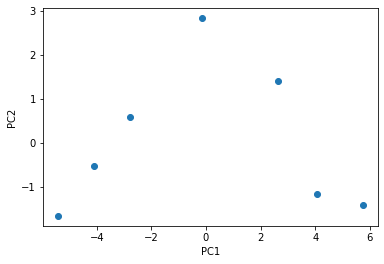

In [22]:
K = 2
# Projecting the data onto the first K principal components
m_cov = np.cov(m_centered.T)
eig_vals, eig_vecs = np.linalg.eig(m_cov)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)
pcs = np.hstack((eig_pairs[k][1].reshape(m_centered.shape[1],1) for k in range(K)))
m_compressed = np.dot(m_centered, pcs)

# Plotting the compressed data
plt.scatter(m_compressed[:, 0], m_compressed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

###  Implement PCA by directly computing the eigenvectors (V) and eigenvalues (D) from covariance matrix

In [23]:
def pca_eigenvectors(X):
    # centering the data
    X_centered = X - np.mean(X, axis=0)
    
    # calculating the covariance matrix
    cov = np.cov(X_centered.T)
    
    # computing the eigenvectors and eigenvalues of the covariance matrix
    D, V = np.linalg.eig(cov)
    
    return D, V

Eigenvectors (V):
[[-4.61333968e-01 -8.46484600e-01  2.65772066e-01 -2.29387567e-01
  -9.82718329e-18]
 [-3.62097126e-01 -9.07014384e-02 -9.17421752e-01  1.08090717e-01
  -2.99188347e-17]
 [-4.61333968e-01  3.34871799e-01  2.65772066e-01  8.39086767e-01
  -3.06305184e-17]
 [ 4.70758755e-01 -2.85567810e-01 -9.23789674e-02  3.40316866e-01
  -7.07106781e-01]
 [ 4.70758755e-01 -2.85567810e-01 -9.23789674e-02  3.40316866e-01
   7.07106781e-01]]
Eigenvalues (D):
[ 8.14739577e+01  3.16484099e-15  2.32645168e-02  9.48509034e-16
 -9.86076132e-32]


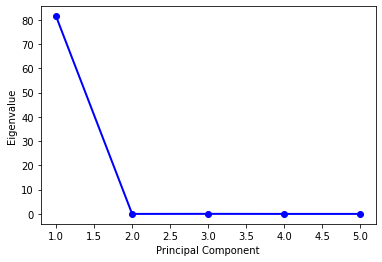

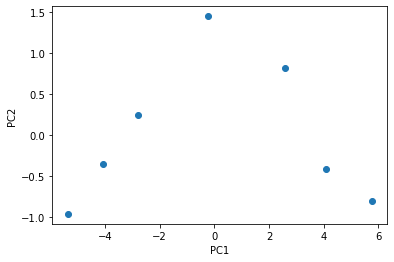

In [24]:
# Implement PCA by directly computing the eigenvectors and eigenvalues from covariance matrix
cov = np.cov(m_centered.T)
D, V = pca_eigenvectors(cov)

# print V and D
print("Eigenvectors (V):")
print(V)
print("Eigenvalues (D):")
print(D)

# Plot the eigenvalues and compressed data to show that the results are the same
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(np.arange(1, len(D)+1), D, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

compressed_data = np.dot(m_centered, V[:,:K])
plt.scatter(compressed_data[:,0], compressed_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Task 2: Human Faces

In this assignment, you will need The Labeled Faces in the Wild dataset which is designed
for the face recognition task. The dataset containing images of faces. Each image is a 62x47
pixel array. The images are read into a matrix. The rows of the matrix are the images
(examples). The features (columns) are the pixels. Each example is represented by a vector
of real numbers of length 2914, listing the pixels from left to right, row by row, from top to
bottom.

https://scikit-learn.org/stable/datasets/index.html#labeled-faces-in-the-wild-dataset


In [25]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)

### Plotting the 4th image

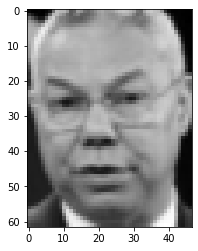

In [26]:
import matplotlib.pyplot as plt

# Display the fourth face in the dataset
plt.imshow(lfw_people.images[3], cmap='gray')
plt.show()


### Computing the _mean_ face

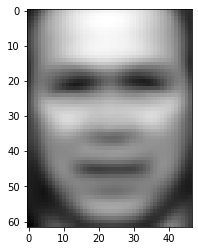

In [27]:
mean_image = np.mean(lfw_people.data, axis=0)
plt.imshow(mean_image.reshape(lfw_people.images[0].shape), cmap='gray')

### Dimensionality reduction using PCA

In [28]:
# center the data
X_centered = lfw_people.data - mean_image

# perform SVD on the centered data using self implemented function
eig_vecs, s, eig_vals, cum_var_exp = svd_pca(X_centered)


### Computing the 5 top principal components

In [29]:
# get the top 5 principal components
pcs = eig_vecs[:,:5]

print("Top 5 Principal Components (eigenvectors):")
print(pcs)

Top 5 Principal Components (eigenvectors):
[[ 0.00541448  0.01743797  0.01787703  0.03354654  0.01323737]
 [ 0.00574601  0.01645396  0.01604368  0.03529812  0.01367978]
 [ 0.00617269  0.01627389  0.01490346  0.03671623  0.01414533]
 ...
 [ 0.0104232  -0.03325813  0.03732289  0.03851208 -0.09052396]
 [ 0.00881245 -0.03267524  0.0332288   0.03534156 -0.08368309]
 [ 0.00734856 -0.03144973  0.03096117  0.02925286 -0.07454129]]


### Values of the associated 5 attributes of the fourth image

In [30]:
# Get the fourth image
fourth_image = lfw_people.data[3]

# Center the image
centered_image = fourth_image - mean_image

# Compute the values of the associated 5 attributes
values = np.dot(centered_image, pcs)

print(values)


[-204.05322  -261.49615  -419.61713    29.827906   39.514534]


### Projecting the fourth face in the dataset onto the first 5 principal components

In [31]:
# Project the mean-centered fourth face onto the first 5 principal components
projected_face = np.dot(fourth_image, pcs)

print("Projected face onto the first 5 principal components:")
print(projected_face)


Projected face onto the first 5 principal components:
[6806.5903   301.77585  170.1567  1323.3544   776.1802 ]


### Projecting the fourth face in the dataset onto the first 5 principal components into the original space

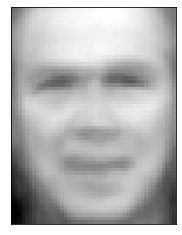

In [32]:
# Project the mean-centered fourth face onto the first 5 principal components
projected_face = np.dot(fourth_image, pcs)

# Reconstruct the image from the projected face
reconstructed_image = mean_image + np.dot(projected_face, pcs.T)

# Display the reconstructed image
plt.imshow(reconstructed_image.reshape(lfw_people.images[3].shape), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()



### Repeating the steps with the 50 top principal components

Top 50 Principal Components (eigenvectors):
[[ 0.00541448  0.01743797  0.01787703 ... -0.01456711 -0.01257264
  -0.01928211]
 [ 0.00574601  0.01645396  0.01604368 ... -0.01941406 -0.01544435
  -0.01879638]
 [ 0.00617269  0.01627389  0.01490346 ... -0.02811483 -0.01752081
  -0.01502508]
 ...
 [ 0.0104232  -0.03325813  0.03732289 ...  0.0116703   0.00432847
   0.02627419]
 [ 0.00881245 -0.03267524  0.0332288  ...  0.02473753  0.0079028
   0.01773241]
 [ 0.00734856 -0.03144973  0.03096117 ...  0.02685687  0.01597409
   0.01365937]]
[-204.05322  -261.49615  -419.61713    29.827906   39.514534]
Projected face onto the first 50 principal components:
[6806.5903    301.77585   170.1567   1323.3544    776.1802    830.92706
 -190.4397   -106.91593  -236.164    -206.95183  -610.4728    -52.2378
  383.9408    590.36804  -605.336    -197.21973  -468.14413  -478.02048
  586.53546   410.6894    159.3937   -418.50638  -215.69792   465.33054
  157.52782  -313.22464  -220.69554   128.44727    23.888678 

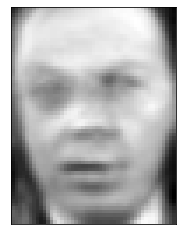

In [33]:
# get the top 50 principal components
pcs50 = eig_vecs[:,:50]

print("Top 50 Principal Components (eigenvectors):")
print(pcs50)

# Compute the values of the associated 5 attributes
values50 = np.dot(centered_image, pcs50)
print(values)

# Project the mean-centered fourth face onto the first 5 principal components
projected_face50 = np.dot(fourth_image, pcs50)

print("Projected face onto the first 50 principal components:")
print(projected_face50)

# Project the mean-centered fourth face onto the first 5 principal components
projected_face50 = np.dot(fourth_image, pcs50)

# Reconstruct the image from the projected face
reconstructed_image50 = mean_image + np.dot(projected_face50, pcs50.T)

# Display the reconstructed image
plt.imshow(reconstructed_image50.reshape(lfw_people.images[3].shape), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


In [4]:
# get MNIST dataset 
from sklearn.datasets import fetch_openml
mnist = mnist = fetch_openml('mnist_784')

# get the first 1000 images
X = mnist.data[:100]
y = mnist.target[:100]

# display all the images in a grid
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.show()

/Users/soumenmohanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)